# KNN Model

## Read the data

In [86]:
# Read the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Matriz de confusión
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Reporte de clasificación
from sklearn.metrics import classification_report

In [87]:
# Read the data
df = pd.read_csv('../data/processed/weather_classification_data.csv')

df.shape

(13200, 11)

## Clean non-categorical columns

In [88]:
# Drop column `cloud_cover`
df = df.drop(columns=['cloud_cover'])

# Drop column `season`
df = df.drop(columns=['season'])

# Drop column `location`
df = df.drop(columns=['location'])

## Test Clasificador

La variable objetivo es categórica -> elegimos Clasificador.

In [89]:
# Split the data into X and y, target is `weather_type`
X = df.drop('weather_type', axis=1)
y = df['weather_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# check the shape of the resulting dataframes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10560, 7), (2640, 7), (10560,), (2640,))

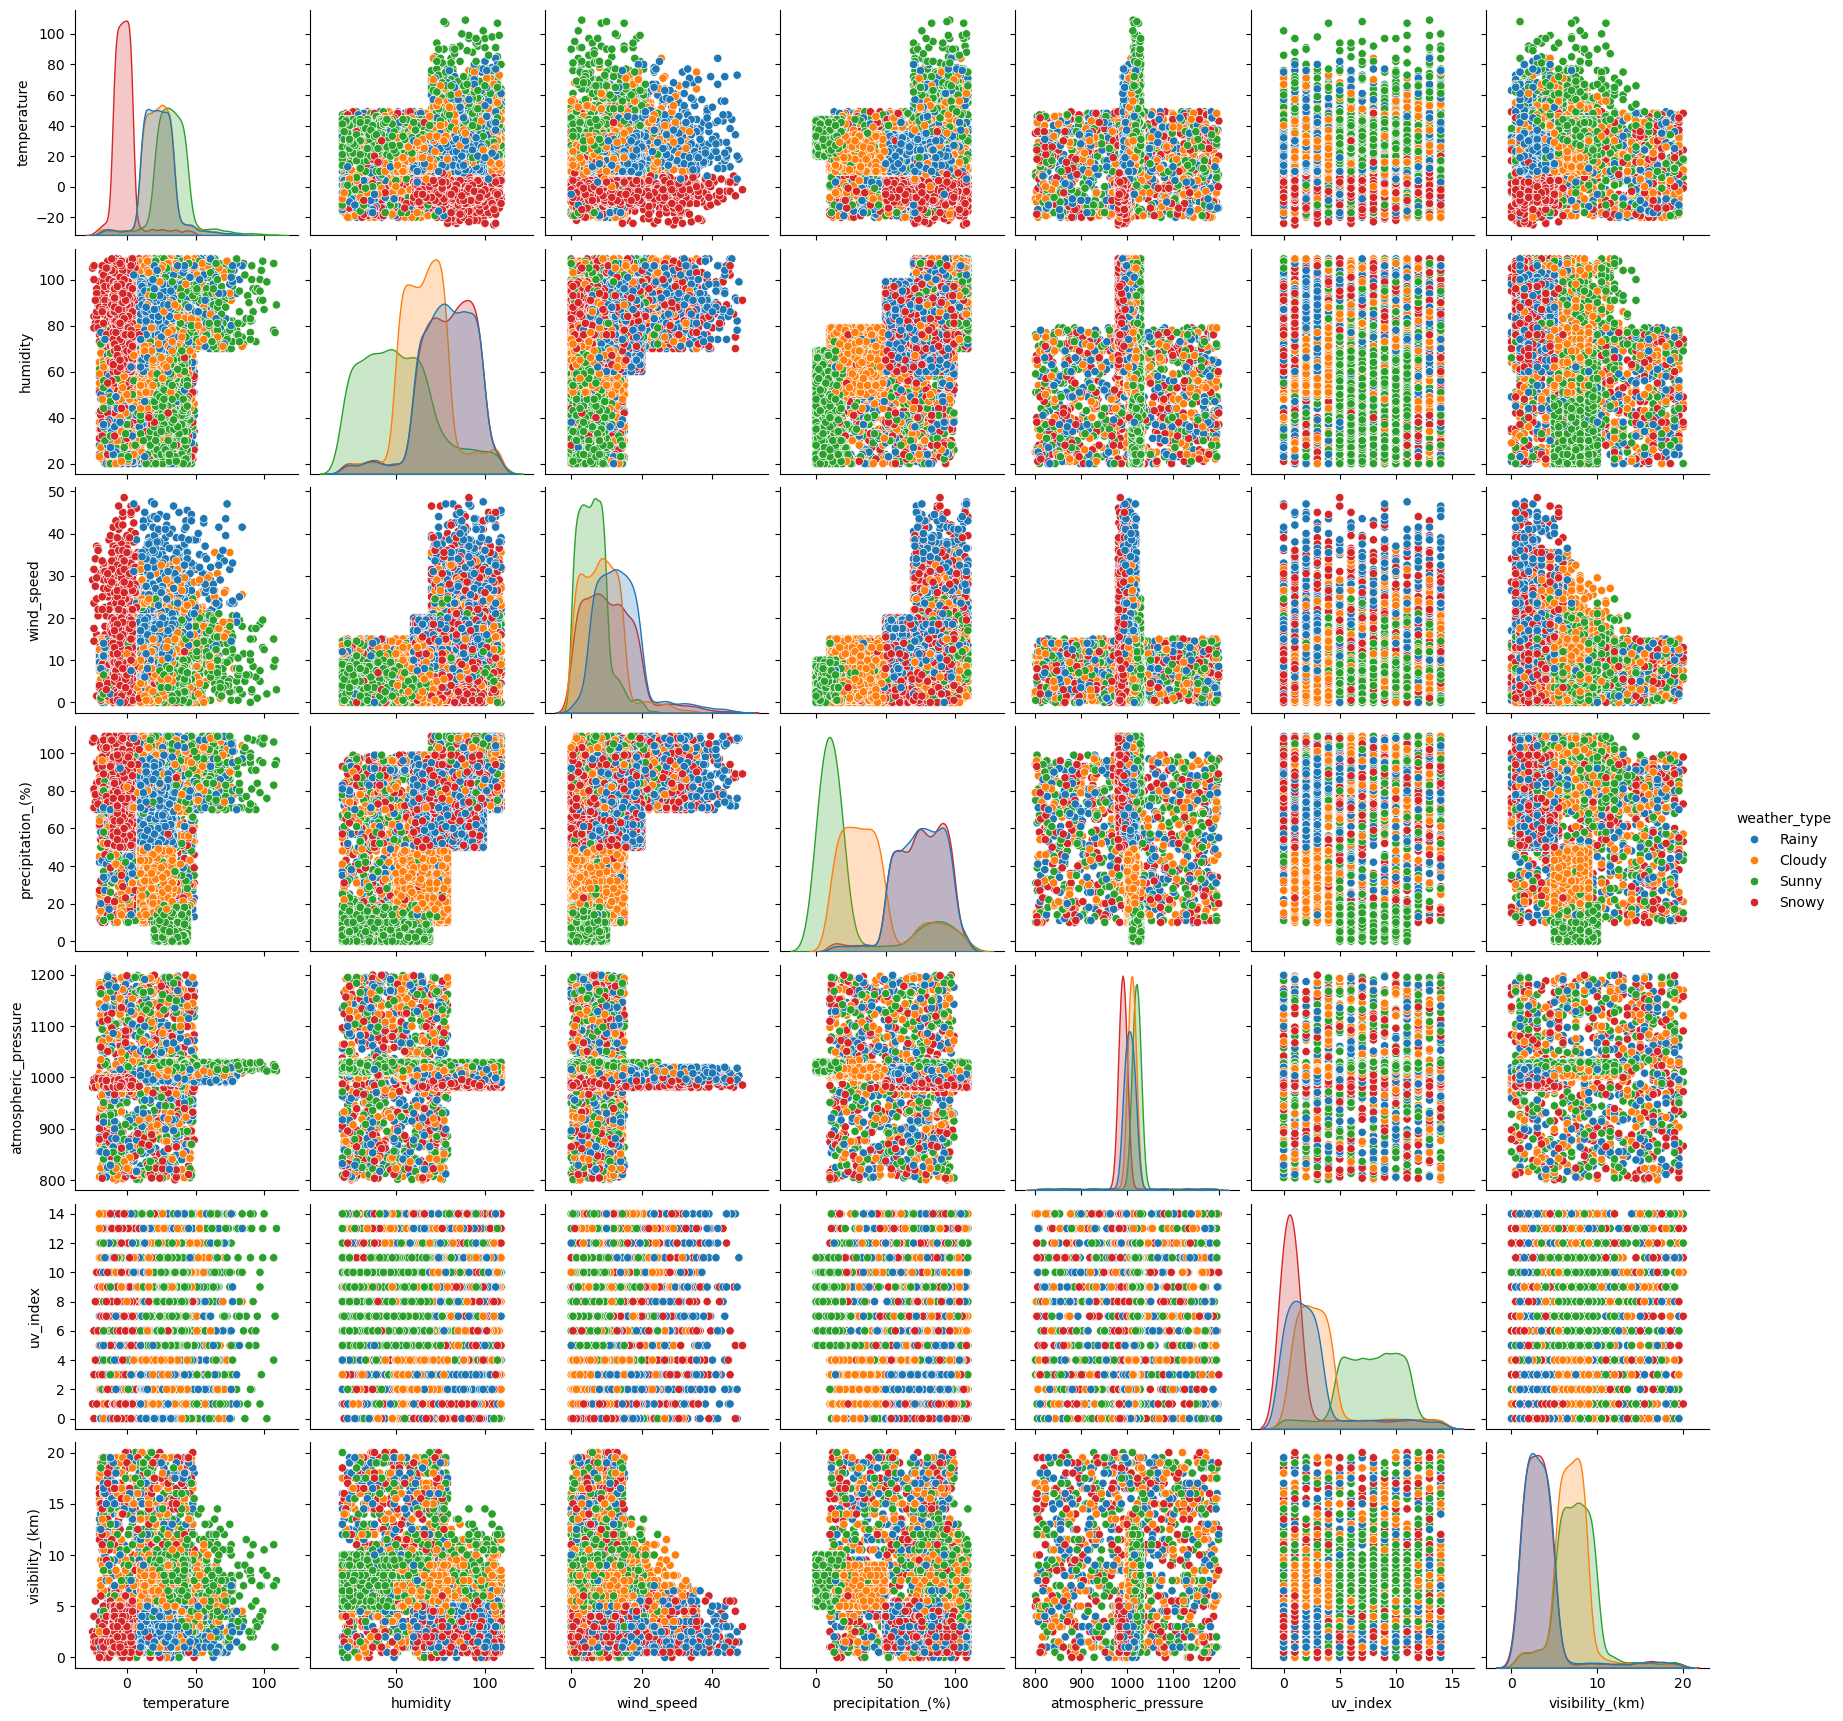

In [90]:
sns.pairplot(df, hue="weather_type")
plt.show()

In [91]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [92]:
# Hacer predicciones
y_pred = knn.predict(X_test)

score = knn.score(X_test, y_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Score: {score:.2f}')
print(f'Accuracy: {accuracy:.2f}')

Score: 0.88
Accuracy: 0.88


## Matriz de confusión

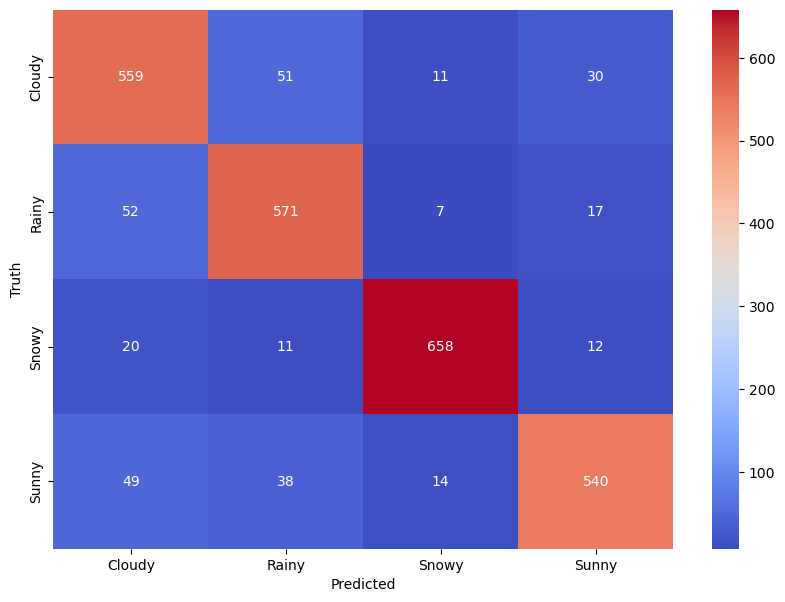

In [ ]:
# Obtener las etiquetas originales
label_encoder = LabelEncoder()
label_encoder.fit(y_test)
labels = label_encoder.classes_

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Plotear la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='coolwarm', mask=(cm == 0))
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

## Reporte de clasificación

In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Cloudy       0.82      0.86      0.84       651
       Rainy       0.85      0.88      0.87       647
       Snowy       0.95      0.94      0.95       701
       Sunny       0.90      0.84      0.87       641

    accuracy                           0.88      2640
   macro avg       0.88      0.88      0.88      2640
weighted avg       0.88      0.88      0.88      2640

